In [1]:
import os
import requests
import time
import string
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# division per country and periods
# start by dividing the liwk files by country and time periods.

# read files
pdLIWK = pd.read_excel('../../LIWK_files/LIWC2015 Results (all_tweets).xlsx',
                       engine='openpyxl', dtype={"Source (A)": str})
pd_indexes = pd.read_csv(
    '../../LIWK_files/all_tweets.csv', dtype={"id_str": str})

china = pd.read_csv(
    "../../data/covid_coronavirus_vaccine_aggregration/4.countries/China.csv", dtype={"id_str": str})
america = pd.read_csv(
    "../../data/covid_coronavirus_vaccine_aggregration/4.countries/USA.csv", dtype={"id_str": str})

china1 = pd.read_csv(
    "../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/China_JanFeb2020.csv", dtype={"id_str": str})
china2 = pd.read_csv(
    "../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/China_SeptOct2020.csv", dtype={"id_str": str})
china3 = pd.read_csv(
    "../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/China_MarchApril2021.csv", dtype={"id_str": str})

america1 = pd.read_csv(
    "../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/USA_JanFeb2020.csv", dtype={"id_str": str})
america2 = pd.read_csv(
    "../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/USA_SeptOct2020.csv", dtype={"id_str": str})
america3 = pd.read_csv(
    "../../data/covid_coronavirus_vaccine_aggregration/3.countries+periods/USA_MarchApril2021.csv", dtype={"id_str": str})


pdLIWK["Source (A)"] = pd_indexes["id_str"]

print("china unique tweets", len(np.unique(china["id_str"])))
print("america unique tweets", len(np.unique(america["id_str"])))
# save the sub df of the result in new files

america1L = pdLIWK[pdLIWK["Source (A)"].isin(america1["id_str"])]
america2L = pdLIWK[pdLIWK["Source (A)"].isin(america2["id_str"])]
america3L = pdLIWK[pdLIWK["Source (A)"].isin(america3["id_str"])]

americaTL = pdLIWK[pdLIWK["Source (A)"].isin(america["id_str"])]

china1L = pdLIWK[pdLIWK["Source (A)"].isin(china1["id_str"])]
china2L = pdLIWK[pdLIWK["Source (A)"].isin(china2["id_str"])]
china3L = pdLIWK[pdLIWK["Source (A)"].isin(china3["id_str"])]

chinaTL = pdLIWK[pdLIWK["Source (A)"].isin(china["id_str"])]


/home/ftrole/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


china unique tweets 4637
america unique tweets 11911


In [3]:
america1L


,Source (A),Source (B),WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,1230806996087169024,"""'Shameful'\n\nUkrainians attack a bus carryi...",15.0,99.00,50.00,10.08,1.00,15.0,40.00,46.67,...,0.00,0.00,0.0,0.0,0.0,0.0,6.67,13.33,0.0,13.33
1,1230735700745539590,RT @AJENews: China's Hubei says 220 people fro...,23.0,93.26,90.38,1.00,25.77,23.0,21.74,52.17,...,0.00,4.35,0.0,0.0,0.0,0.0,0.00,8.70,0.0,17.39
2,1230647176990253061,China coronavirus outbreak: All the latest upd...,12.0,98.14,50.00,23.51,25.77,12.0,33.33,41.67,...,0.00,8.33,0.0,0.0,0.0,0.0,0.00,0.00,0.0,16.67
3,1230375401874169866,China expels foreign journalists as coronaviru...,13.0,93.26,50.00,1.40,25.77,13.0,30.77,38.46,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,15.38
4,1230292370027163649,China coronavirus outbreak: All the latest upd...,12.0,98.14,50.00,23.51,25.77,12.0,33.33,50.00,...,0.00,8.33,0.0,0.0,0.0,0.0,0.00,0.00,0.0,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574,1220470777100808197,Lam says Hong Kong has system in place to hand...,21.0,96.66,68.29,2.82,25.77,21.0,14.29,33.33,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,19.05
4575,1220427456680800257,"Wall Street hit by coronavirus concerns, weak ...",18.0,97.07,50.00,4.97,1.00,18.0,27.78,44.44,...,5.56,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,22.22
4576,1220398288349863937,"'Amid fears of a new Chinese coronavirus, Lag...",25.0,99.00,65.56,1.59,1.00,25.0,44.00,68.00,...,4.00,0.00,0.0,0.0,0.0,0.0,0.00,4.00,0.0,0.00
4577,1219921523173183489,Hong Kong on high alert to tackle coronavirus ...,19.0,98.71,50.00,4.05,25.77,19.0,21.05,26.32,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,21.05


# Marker statistics

In [4]:
# china vs america
print("china:\n ", chinaTL.mean(axis=0)[["Analytic", "Authentic", "Clout", "Tone", "we", "they", "anger", "negemo", "posemo", "death",
      "focuspresent", "focuspast", "focusfuture", "drives"]])
print("\n USA:\n ", americaTL.mean(axis=0)[["Analytic", "Authentic", "Clout", "Tone", "we", "they", "anger", "negemo", "posemo", "death",
      "focuspresent", "focuspast", "focusfuture", "drives"]])
# china1 vs america1
print("china:\n ", china1L.mean(axis=0)[["Analytic", "Authentic", "Clout", "Tone", "we", "they", "anger", "negemo", "posemo", "death",
      "focuspresent", "focuspast", "focusfuture", "drives"]])
print("\n USA:\n ", america1L.mean(axis=0)[["Analytic", "Authentic", "Clout", "Tone", "we", "they", "anger", "negemo", "posemo", "death",
      "focuspresent", "focuspast", "focusfuture", "drives"]])
# china2 vs america2
print("china:\n ", china2L.mean(axis=0)[["Analytic", "Authentic", "Clout", "Tone", "we", "they", "anger", "negemo", "posemo", "death",
      "focuspresent", "focuspast", "focusfuture", "drives"]])
print("\n USA:\n ", america2L.mean(axis=0)[["Analytic", "Authentic", "Clout", "Tone", "we", "they", "anger", "negemo", "posemo", "death",
      "focuspresent", "focuspast", "focusfuture", "drives"]])

# china3 vs america3
print("china:\n ", china3L.mean(axis=0)[["Analytic", "Authentic", "Clout", "Tone", "we", "they", "anger", "negemo", "posemo", "death",
      "focuspresent", "focuspast", "focusfuture", "drives"]])
print("\n USA:\n ", america3L.mean(axis=0)[["Analytic", "Authentic", "Clout", "Tone", "we", "they", "anger", "negemo", "posemo", "death",
      "focuspresent", "focuspast", "focusfuture", "drives"]])


/tmp/ipykernel_3907/1335216997.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("china:\n ", chinaTL.mean(axis=0)[["Analytic","Authentic", "Clout","Tone", "we", "they", "anger", "negemo", "posemo", "death",


china:
  Analytic        95.194311
Authentic       28.266114
Clout           63.153146
Tone            34.315687
we               0.139021
they             0.270231
anger            0.717975
negemo           1.411658
posemo           1.433567
death            0.526905
focuspresent     5.028799
focuspast        1.725428
focusfuture      0.576271
drives           6.157958
dtype: float64


/tmp/ipykernel_3907/1335216997.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("\n USA:\n ", americaTL.mean(axis=0)[["Analytic","Authentic", "Clout","Tone", "we", "they", "anger", "negemo", "posemo", "death",
/tmp/ipykernel_3907/1335216997.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("china:\n ", china1L.mean(axis=0)[["Analytic","Authentic", "Clout","Tone", "we", "they", "anger", "negemo", "posemo", "death",
/tmp/ipykernel_3907/1335216997.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns befo


 USA:
  Analytic        93.686016
Authentic       20.876167
Clout           60.917008
Tone            32.281219
we               0.301152
they             0.203771
anger            0.341949
negemo           1.398439
posemo           1.110855
death            0.506842
focuspresent     4.219470
focuspast        1.545400
focusfuture      0.666743
drives           6.078750
dtype: float64
china:
  Analytic        95.045988
Authentic       24.744241
Clout           64.579416
Tone            32.509525
we               0.186539
they             0.320588
anger            1.126122
negemo           1.834975
posemo           1.610263
death            0.677882
focuspresent     5.101847
focuspast        1.566155
focusfuture      0.522940
drives           6.349174
dtype: float64

 USA:
  Analytic        94.140542
Authentic       24.111404
Clout           60.199411
Tone            25.863866
we               0.344075
they             0.175792
anger            0.387335
negemo           1.488859
posemo 

/tmp/ipykernel_3907/1335216997.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("\n USA:\n ", america2L.mean(axis=0)[["Analytic","Authentic", "Clout","Tone", "we", "they", "anger", "negemo", "posemo", "death",
/tmp/ipykernel_3907/1335216997.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("china:\n ", china3L.mean(axis=0)[["Analytic","Authentic", "Clout","Tone", "we", "they", "anger", "negemo", "posemo", "death",
/tmp/ipykernel_3907/1335216997.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns b

## Box plots


### Comparison China - Outside China: Total

#### LIWC summary variables

/tmp/ipykernel_3907/980676588.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_total = pd.DataFrame(americaTL.mean(
/tmp/ipykernel_3907/980676588.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_total = pd.DataFrame(chinaTL.mean(


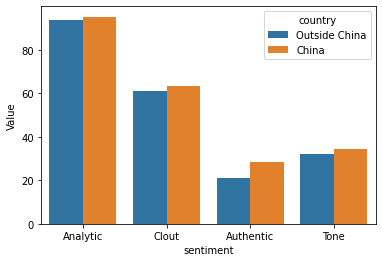

In [5]:
# total
america_total = pd.DataFrame(americaTL.mean(
    axis=0)[["Analytic", "Clout", "Authentic", "Tone"]])
america_total.rename(columns={0: "value"}, inplace=True)
america_total['sentiment'] = america_total.index
america_total.reset_index(drop=True, inplace=True)
america_total.insert(0, 'country', 'Outside China')

china_total = pd.DataFrame(chinaTL.mean(
    axis=0)[["Analytic", "Clout", "Authentic", "Tone"]])
china_total.rename(columns={0: "value"}, inplace=True)
china_total['sentiment'] = china_total.index
china_total.reset_index(drop=True, inplace=True)
china_total.insert(0, 'country', 'China')

total = pd.concat([america_total, china_total])

total
tot = sns.barplot(data=total, x='sentiment', hue='country', y="value")
tot.set(ylabel='Value')
plt.savefig('./hystograms/summary_variables.pdf')
plt.show()


#### all markers comparison

/tmp/ipykernel_3907/3892458044.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_total = pd.DataFrame(americaTL.mean(
/tmp/ipykernel_3907/3892458044.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_total = pd.DataFrame(chinaTL.mean(


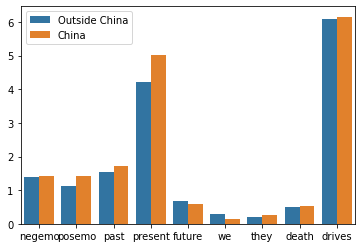

In [6]:
# total
america_total = pd.DataFrame(americaTL.mean(
    axis=0)[["negemo", "posemo", "focuspast", "focuspresent", "focusfuture", "we", "they", "death", "drives"]])
america_total.rename(columns={0: "value"}, inplace=True)
america_total['sentiment'] = america_total.index
america_total.reset_index(drop=True, inplace=True)
america_total.insert(0, 'country', 'Outside China')

china_total = pd.DataFrame(chinaTL.mean(
    axis=0)[["negemo", "posemo", "focuspast", "focuspresent", "focusfuture", "we", "they", "death", "drives"]])
china_total.rename(columns={0: "value"}, inplace=True)
china_total['sentiment'] = china_total.index
china_total.reset_index(drop=True, inplace=True)
china_total.insert(0, 'country', 'China')

total = pd.concat([america_total, china_total])
total['sentiment'].replace(
    {'focuspast': 'past', 'focuspresent': 'present', 'focusfuture': 'future'}, inplace=True)

tot = sns.barplot(data=total, x='sentiment', hue='country', y="value")
tot.set(xlabel="", ylabel='')
tot.legend(title="")
# tot.tick_params(labelsize=10)
plt.savefig('./hystograms/other_variables.pdf')
plt.show()


#### Few thoughts
- The value of the marker 'Authentic' is the only main difference
- chine has higher posemo and present, very high drives 
for both

### Analysis on the single periods
Comparison between countries on different periods

negemo

/tmp/ipykernel_3907/1121779633.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["negemo"]], america2L.mean(
/tmp/ipykernel_3907/1121779633.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["negemo"]], america3L.mean(axis=0)[["negemo"]]])
/tmp/ipykernel_3907/1121779633.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["negemo"]], china2L.mean(
/tmp/ipykernel_3907/1121779

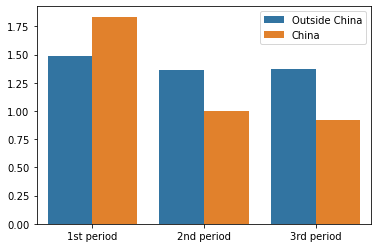

In [7]:
america_periods = pd.concat([america1L.mean(axis=0)[["negemo"]], america2L.mean(
    axis=0)[["negemo"]], america3L.mean(axis=0)[["negemo"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["negemo"]], china2L.mean(
    axis=0)[["negemo"]], china3L.mean(axis=0)[["negemo"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/negative_emotions.pdf')
plt.show()


posemo

/tmp/ipykernel_3907/3356276310.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["posemo"]], america2L.mean(
/tmp/ipykernel_3907/3356276310.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["posemo"]], america3L.mean(axis=0)[["posemo"]]])
/tmp/ipykernel_3907/3356276310.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["posemo"]], china2L.mean(
/tmp/ipykernel_3907/3356276

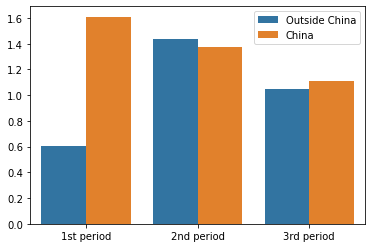

In [8]:
america_periods = pd.concat([america1L.mean(axis=0)[["posemo"]], america2L.mean(
    axis=0)[["posemo"]], america3L.mean(axis=0)[["posemo"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["posemo"]], china2L.mean(
    axis=0)[["posemo"]], china3L.mean(axis=0)[["posemo"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/positive_emotions.pdf')
plt.show()


drives

/tmp/ipykernel_3907/1066833453.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["drives"]], america2L.mean(
/tmp/ipykernel_3907/1066833453.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["drives"]], america3L.mean(axis=0)[["drives"]]])
/tmp/ipykernel_3907/1066833453.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["drives"]], china2L.mean(
/tmp/ipykernel_3907/1066833

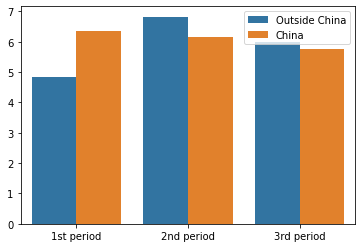

In [9]:
america_periods = pd.concat([america1L.mean(axis=0)[["drives"]], america2L.mean(
    axis=0)[["drives"]], america3L.mean(axis=0)[["drives"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["drives"]], china2L.mean(
    axis=0)[["drives"]], china3L.mean(axis=0)[["drives"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/drives.pdf')
plt.show()


affiliation

/tmp/ipykernel_3907/3394653921.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["affiliation"]], america2L.mean(
/tmp/ipykernel_3907/3394653921.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["affiliation"]], america3L.mean(axis=0)[["affiliation"]]])
/tmp/ipykernel_3907/3394653921.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["affiliation"]], china2L.mean(
/tmp/ip

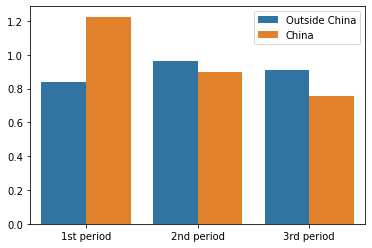

In [33]:
america_periods = pd.concat([america1L.mean(axis=0)[["affiliation"]], america2L.mean(
    axis=0)[["affiliation"]], america3L.mean(axis=0)[["affiliation"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["affiliation"]], china2L.mean(
    axis=0)[["affiliation"]], china3L.mean(axis=0)[["affiliation"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/affiliation.pdf')
plt.show()


empowerment ( mean of power, achieve, reward, insight and cause )

/tmp/ipykernel_3907/1740442907.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_first = america1L.mean(
/tmp/ipykernel_3907/1740442907.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_second = america2L.mean(
/tmp/ipykernel_3907/1740442907.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_third = america3L.mean(
/tmp/ipykernel_3907/1740442907.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecate

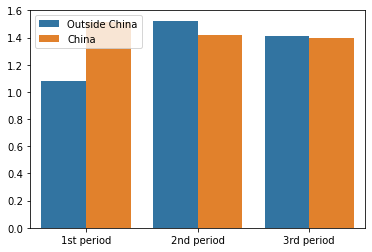

In [60]:
america_first = america1L.mean(
    axis=0)[["power", "achieve", "reward", "insight", "cause"]].mean(axis=0)
america_second = america2L.mean(
    axis=0)[["power", "achieve", "reward", "insight", "cause"]].mean(axis=0)
america_third = america3L.mean(
    axis=0)[["power", "achieve", "reward", "insight", "cause"]].mean(axis=0)
america_periods = pd.DataFrame(data={"value":[america_first, america_second, america_third], "country": "Outside China", "period":['1st period', '2nd period', '3rd period']})

china_first = china1L.mean(
    axis=0)[["power", "achieve", "reward", "insight", "cause"]].mean(axis=0)
china_second = china2L.mean(
    axis=0)[["power", "achieve", "reward", "insight", "cause"]].mean(axis=0)
china_third = china3L.mean(
    axis=0)[["power", "achieve", "reward", "insight", "cause"]].mean(axis=0)
china_periods = pd.DataFrame(data={"value":[china_first, china_second, china_third], "country": "China", "period":['1st period', '2nd period', '3rd period']})

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
#plt.savefig('./hystograms/affiliation.pdf')
plt.show()


we

/tmp/ipykernel_3907/3576462238.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["we"]], america2L.mean(
/tmp/ipykernel_3907/3576462238.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["we"]], america3L.mean(axis=0)[["we"]]])
/tmp/ipykernel_3907/3576462238.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["we"]], china2L.mean(
/tmp/ipykernel_3907/3576462238.py:10: Futur

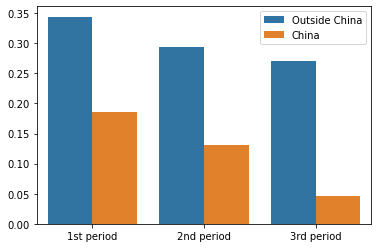

In [10]:
america_periods = pd.concat([america1L.mean(axis=0)[["we"]], america2L.mean(
    axis=0)[["we"]], america3L.mean(axis=0)[["we"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["we"]], china2L.mean(
    axis=0)[["we"]], china3L.mean(axis=0)[["we"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/we.pdf')
plt.show()


they

/tmp/ipykernel_3907/4256176078.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["they"]], america2L.mean(
/tmp/ipykernel_3907/4256176078.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["they"]], america3L.mean(axis=0)[["they"]]])
/tmp/ipykernel_3907/4256176078.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["they"]], china2L.mean(
/tmp/ipykernel_3907/4256176078.py:1

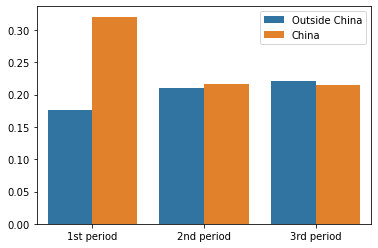

In [11]:
america_periods = pd.concat([america1L.mean(axis=0)[["they"]], america2L.mean(
    axis=0)[["they"]], america3L.mean(axis=0)[["they"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["they"]], china2L.mean(
    axis=0)[["they"]], china3L.mean(axis=0)[["they"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/they.pdf')
plt.show()


focuspast 

/tmp/ipykernel_3907/2980196719.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["focuspast"]], america2L.mean(
/tmp/ipykernel_3907/2980196719.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["focuspast"]], america3L.mean(axis=0)[["focuspast"]]])
/tmp/ipykernel_3907/2980196719.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["focuspast"]], china2L.mean(
/tmp/ipykernel_

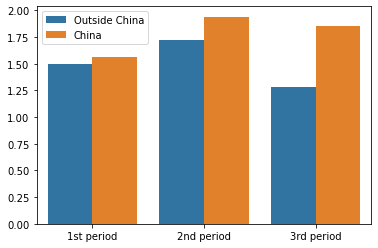

In [12]:
america_periods = pd.concat([america1L.mean(axis=0)[["focuspast"]], america2L.mean(
    axis=0)[["focuspast"]], america3L.mean(axis=0)[["focuspast"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["focuspast"]], china2L.mean(
    axis=0)[["focuspast"]], china3L.mean(axis=0)[["focuspast"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/focuspast.pdf')
plt.show()


focuspresent

/tmp/ipykernel_3907/3587765051.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["focuspresent"]], america2L.mean(
/tmp/ipykernel_3907/3587765051.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["focuspresent"]], america3L.mean(axis=0)[["focuspresent"]]])
/tmp/ipykernel_3907/3587765051.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["focuspresent"]], china2L.mean(
/tm

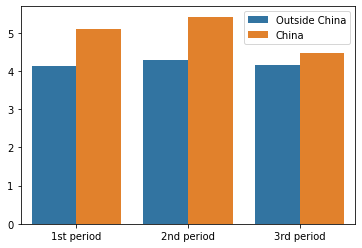

In [13]:
america_periods = pd.concat([america1L.mean(axis=0)[["focuspresent"]], america2L.mean(
    axis=0)[["focuspresent"]], america3L.mean(axis=0)[["focuspresent"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["focuspresent"]], china2L.mean(
    axis=0)[["focuspresent"]], china3L.mean(axis=0)[["focuspresent"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/focuspresent.pdf')
plt.show()


focusfuture

/tmp/ipykernel_3907/127504225.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["focusfuture"]], america2L.mean(
/tmp/ipykernel_3907/127504225.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["focusfuture"]], america3L.mean(axis=0)[["focusfuture"]]])
/tmp/ipykernel_3907/127504225.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["focusfuture"]], china2L.mean(
/tmp/ipyke

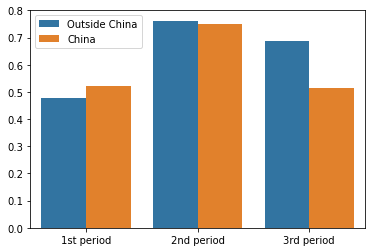

In [14]:
america_periods = pd.concat([america1L.mean(axis=0)[["focusfuture"]], america2L.mean(
    axis=0)[["focusfuture"]], america3L.mean(axis=0)[["focusfuture"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["focusfuture"]], china2L.mean(
    axis=0)[["focusfuture"]], china3L.mean(axis=0)[["focusfuture"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/focusfuture.pdf')
plt.show()


#### Few thoughts
Big difference on we:much bigger in america

#### Death

/tmp/ipykernel_3907/424666199.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  america_periods = pd.concat([america1L.mean(axis=0)[["death"]], america2L.mean(
/tmp/ipykernel_3907/424666199.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axis=0)[["death"]], america3L.mean(axis=0)[["death"]]])
/tmp/ipykernel_3907/424666199.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  china_periods = pd.concat([china1L.mean(axis=0)[["death"]], china2L.mean(
/tmp/ipykernel_3907/424666199.py:1

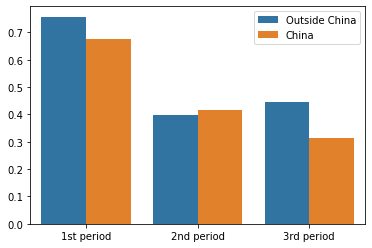

In [15]:
america_periods = pd.concat([america1L.mean(axis=0)[["death"]], america2L.mean(
    axis=0)[["death"]], america3L.mean(axis=0)[["death"]]])
america_periods = pd.DataFrame(america_periods)
america_periods.rename(columns={0: "value"}, inplace=True)
america_periods.reset_index(drop=True, inplace=True)
america_periods.insert(0, 'country', 'Outside China')
america_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

china_periods = pd.concat([china1L.mean(axis=0)[["death"]], china2L.mean(
    axis=0)[["death"]], china3L.mean(axis=0)[["death"]]])
china_periods = pd.DataFrame(china_periods)
china_periods.rename(columns={0: "value"}, inplace=True)
china_periods.reset_index(drop=True, inplace=True)
china_periods.insert(0, 'country', 'China')
china_periods.insert(1, 'period', ['1st period', '2nd period', '3rd period'])

total_periods = pd.concat([america_periods, china_periods])

total_periods = sns.barplot(
    data=total_periods, x='period', hue='country', y="value")
total_periods.set(xlabel="", ylabel="")
total_periods.legend(title="")
plt.savefig('./hystograms/death.pdf')
plt.show()


## Search correlation with linear regression

In [89]:
china_tot_reg = chinaTL.copy()
china_tot_reg.insert(loc=0, column="country", value="China")
america_tot_reg = americaTL.copy()
america_tot_reg.insert(loc=0, column="country", value="Outside China")

china_1_reg = china1L.copy()
china_1_reg.insert(loc=0, column="country", value="China")
china_1_reg.insert(loc=0, column="period", value="1st period")
china_2_reg = china2L.copy()
china_2_reg.insert(loc=0, column="country", value="China")
china_2_reg.insert(loc=0, column="period", value="2nd period")
china_3_reg = china3L.copy()
china_3_reg.insert(loc=0, column="country", value="China")
china_3_reg.insert(loc=0, column="period", value="3rd period")
america_1_reg = america1L.copy()
america_1_reg.insert(loc=0, column="country", value="Outside China")
america_1_reg.insert(loc=0, column="period", value="1st period")
america_2_reg = america2L.copy()
america_2_reg.insert(loc=0, column="country", value="Outside China")
america_2_reg.insert(loc=0, column="period", value="2nd period")
america_3_reg = america3L.copy()
america_3_reg.insert(loc=0, column="country", value="Outside China")
america_3_reg.insert(loc=0, column="period", value="3rd period")               


In [90]:
# add empowerment
empowerment_china=pd.DataFrame(china_tot_reg[["power", "achieve", "reward", "insight", "cause"]].mean(axis=1))
china_tot_reg.insert(loc=3, column="empowerment", value=empowerment_china[[0]])

empowerment_china1=pd.DataFrame(china_1_reg[["power", "achieve", "reward", "insight", "cause"]].mean(axis=1))
china_1_reg.insert(loc=3, column="empowerment", value=empowerment_china1[[0]])

empowerment_china2=pd.DataFrame(china_2_reg[["power", "achieve", "reward", "insight", "cause"]].mean(axis=1))
china_2_reg.insert(loc=3, column="empowerment", value=empowerment_china2[[0]])

empowerment_china3=pd.DataFrame(china_3_reg[["power", "achieve", "reward", "insight", "cause"]].mean(axis=1))
china_3_reg.insert(loc=3, column="empowerment", value=empowerment_china3[[0]])


empowerment_america=pd.DataFrame(america_tot_reg[["power", "achieve", "reward", "insight", "cause"]].mean(axis=1))
america_tot_reg.insert(loc=3, column="empowerment", value=empowerment_america[[0]])

empowerment_america1=pd.DataFrame(america_1_reg[["power", "achieve", "reward", "insight", "cause"]].mean(axis=1))
america_1_reg.insert(loc=3, column="empowerment", value=empowerment_america1[[0]])

empowerment_america2=pd.DataFrame(america_2_reg[["power", "achieve", "reward", "insight", "cause"]].mean(axis=1))
america_2_reg.insert(loc=3, column="empowerment", value=empowerment_america2[[0]])

empowerment_america3=pd.DataFrame(america_3_reg[["power", "achieve", "reward", "insight", "cause"]].mean(axis=1))
america_3_reg.insert(loc=3, column="empowerment", value=empowerment_america3[[0]])

In [91]:
tot_reg = pd.concat([china_tot_reg, america_tot_reg])

periods_reg = pd.concat([china_1_reg, america_1_reg,
                        china_2_reg, america_2_reg, china_3_reg, america_3_reg])

### negemo with they

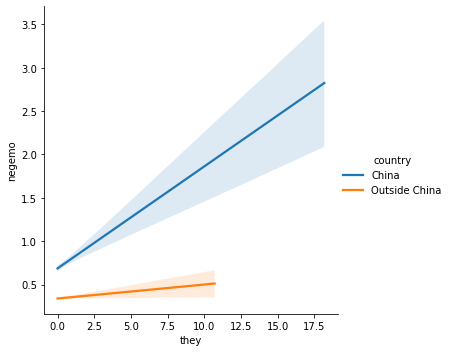

In [17]:
angertot = sns.lmplot(x="they", y="anger", data=tot_reg,
                      hue='country', scatter=False, ci=80)
angertot.set(ylabel="negemo")
plt.savefig('./linear_regression/they_anger_tot.pdf')
plt.show()


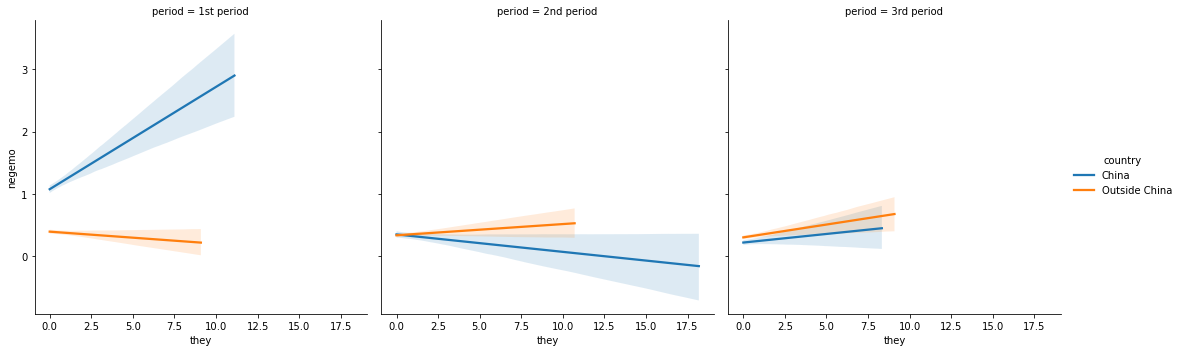

In [18]:
angerp = sns.lmplot(x="they", y="anger", data=periods_reg,
                    hue='country', col='period', scatter=False, ci=80)
angerp.set(ylabel="negemo")
plt.savefig('./linear_regression/they_anger_periods.pdf')
plt.show()


### posemo with we
This is a clear sign of propaganda: in china, even if the things are not going well the line is pretty steep. In america, on the other hand the gradient is negative

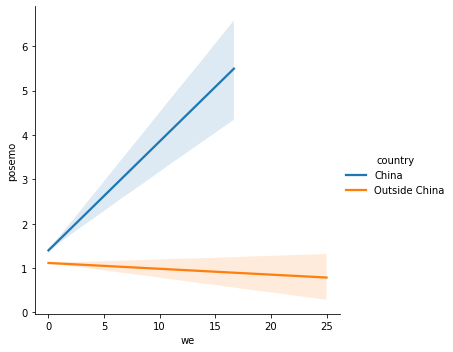

In [19]:
sns.lmplot(x="we", y="posemo", data=tot_reg,
           hue='country', scatter=False, ci=80)
plt.savefig('./linear_regression/we_posemo_tot.pdf')
plt.show()


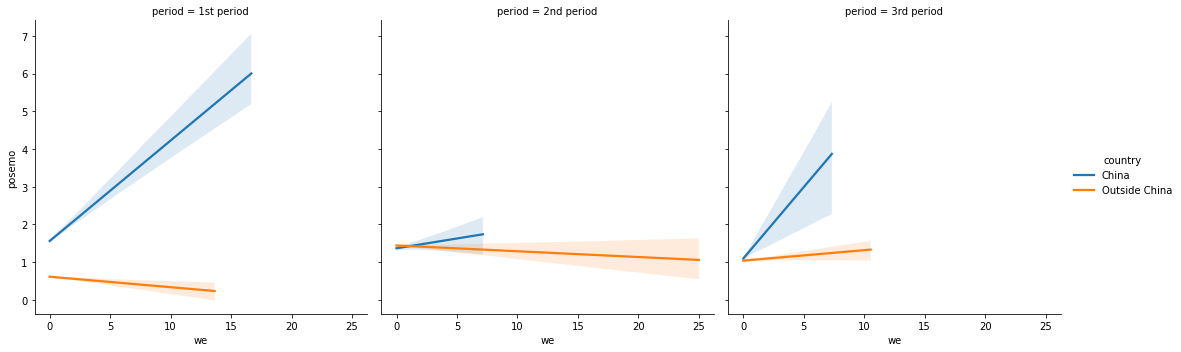

In [20]:
sns.lmplot(x="we", y="posemo", data=periods_reg,
           hue='country', col='period', scatter=False, ci=60)
plt.savefig('./linear_regression/we_posemo_periods.pdf')
plt.show()


### posemo with focusfuture

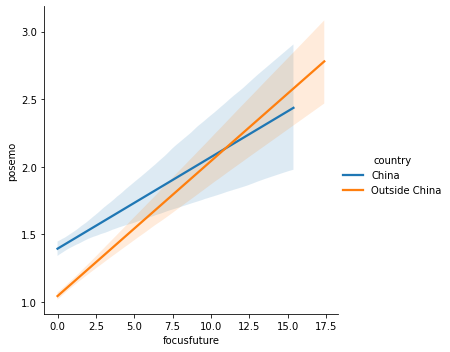

In [21]:
sns.lmplot(x="focusfuture", y="posemo", data=tot_reg,
           hue='country', scatter=False, ci=80)
plt.savefig('./linear_regression/focusfuture_posemo_tot.pdf')
plt.show()


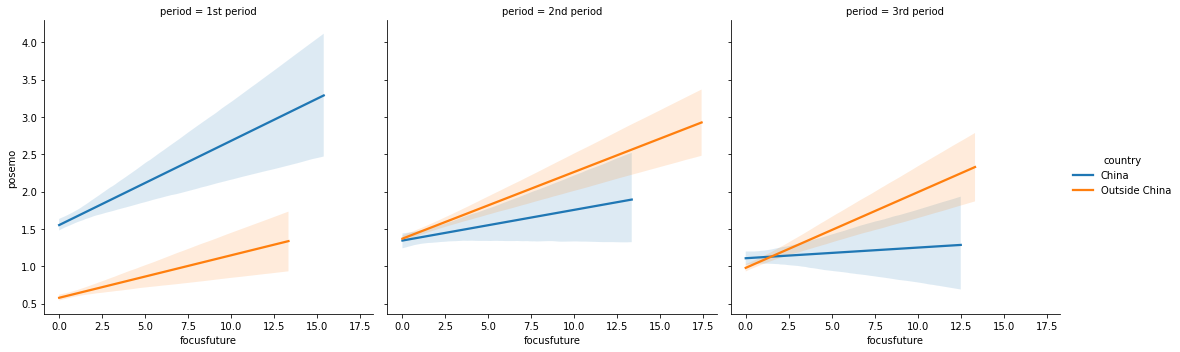

In [22]:
sns.lmplot(x="focusfuture", y="posemo", data=periods_reg,
           hue='country', col='period', scatter=False, ci=80)
plt.savefig('./linear_regression/focusfuture_posemo_periods.pdf')
plt.show()


### focuspresent with posemo

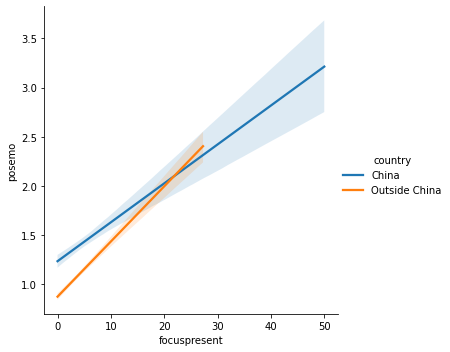

In [23]:
sns.lmplot(x="focuspresent", y="posemo", data=tot_reg,
           hue='country', scatter=False, ci=80)
plt.savefig('./linear_regression/focuspresent_posemo_tot.pdf')
plt.show()


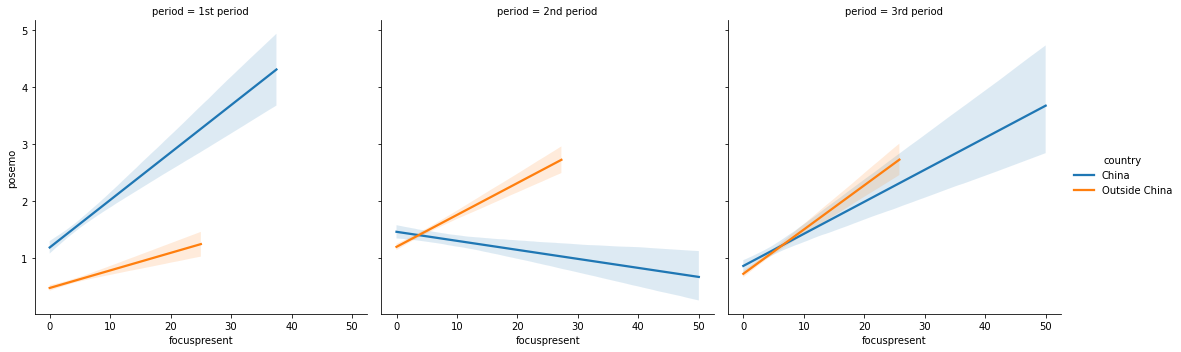

In [24]:
sns.lmplot(x="focuspresent", y="posemo", data=periods_reg,
           hue='country', col='period', scatter=False, ci=80)
plt.savefig('./linear_regression/focuspresent_posemo_periods.pdf')
plt.show()


### focusfuture with negemo

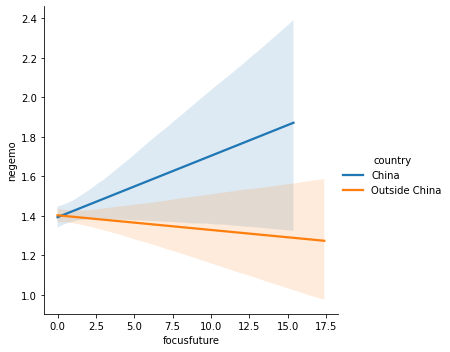

In [25]:
sns.lmplot(x="focusfuture", y="negemo", data=tot_reg,
           hue='country', scatter=False, ci=80)
plt.savefig('./linear_regression/focusfuture_negemo_tot.pdf')
plt.show()


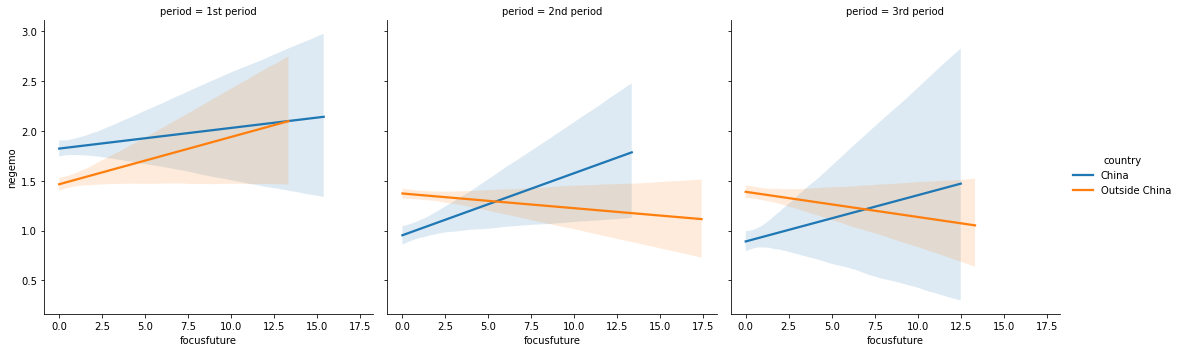

In [26]:
sns.lmplot(x="focusfuture", y="negemo", data=periods_reg,
           hue='country', col='period', scatter=False, ci=80)
plt.savefig('./linear_regression/focusfuture_negemo_periods.pdf')
plt.show()


### focuspresent with negemo


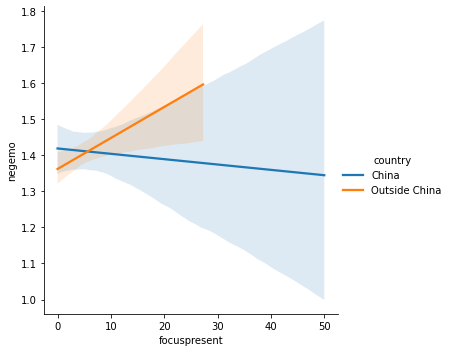

In [27]:
sns.lmplot(x="focuspresent", y="negemo", data=tot_reg,
           hue='country', scatter=False, ci=80)
plt.savefig('./linear_regression/focuspresent_negemo_tot.pdf')
plt.show()


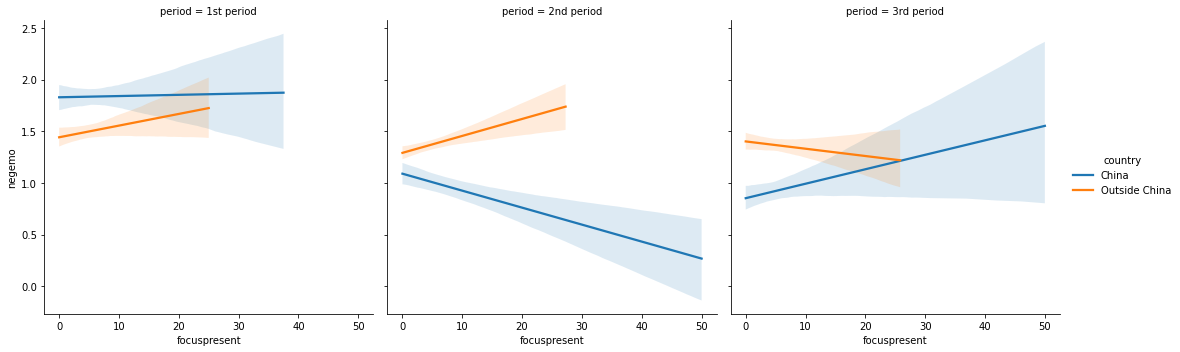

In [32]:
sns.lmplot(x="focuspresent", y="negemo", data=periods_reg,
           hue='country', col='period', scatter=False, ci=80)
plt.savefig('./linear_regression/focuspresent_negemo_periods.pdf')
plt.show()


we empowerment

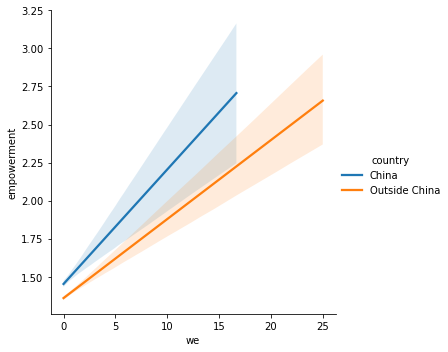

In [94]:
sns.lmplot(x="we", y="empowerment", data=tot_reg,
           hue='country', scatter=False, ci=70)
# plt.savefig('./linear_regression/focuspresent_negemo_tot.pdf')
plt.show()


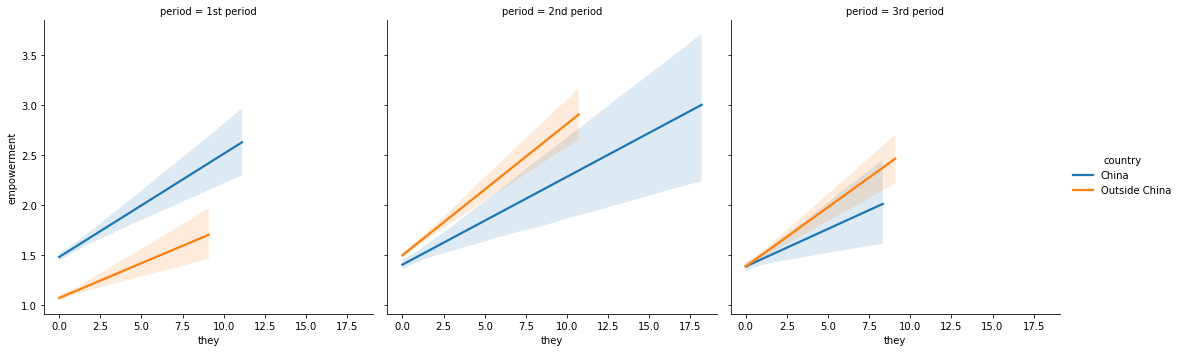

In [97]:
sns.lmplot(x="we", y="empowerment", data=periods_reg,
           hue='country', col='period', scatter=False, ci=80)
# plt.savefig('./linear_regression/focuspresent_negemo_periods.pdf')
plt.show()
